In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing_data = pd.read_csv('/Users/vrishab.m.w/Downloads/cleaned_housing_data.csv')

In [4]:
housing_data.shape

(6830, 21)

In [5]:
housing_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
housing_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,...,1,0,156,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,...,2,0,134,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,...,1,2,120,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067,...,2,0,245,210.0,1910,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-10-08,2.5,3067,...,1,2,256,107.0,1890,Yarra,-37.8060,144.9954,Northern Metropolitan,4019


In [7]:
housing_data.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea      634
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

In [9]:
target = 'Price'
features = ['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Distance', 'Type', 'Regionname']

X = housing_data[features]
y = housing_data[target]

In [10]:
X = pd.get_dummies(X, drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared score: {r2}')

RMSE: 291840.1788980417
R-squared score: 0.7980618467318524


In [15]:
print(housing_data['Price'].mean())
print(housing_data['Price'].median())

1077603.7828696924
890000.0


In [16]:
y_log = np.log1p(housing_data['Price'])

In [17]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, random_state=42, test_size=0.2)

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train_log)

RandomForestRegressor(random_state=42)

In [19]:
y_pred_log = model.predict(X_test)

In [20]:
y_test_actual = np.expm1(y_test_log)
y_pred_actual = np.expm1(y_pred_log)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2 = r2_score(y_test_actual, y_pred_actual)

print(f'RMSE after log transform: {rmse}')
print(f'R-squared after log transform: {r2}')

RMSE after log transform: 288331.48184803803
R-squared after log transform: 0.8028883276951776


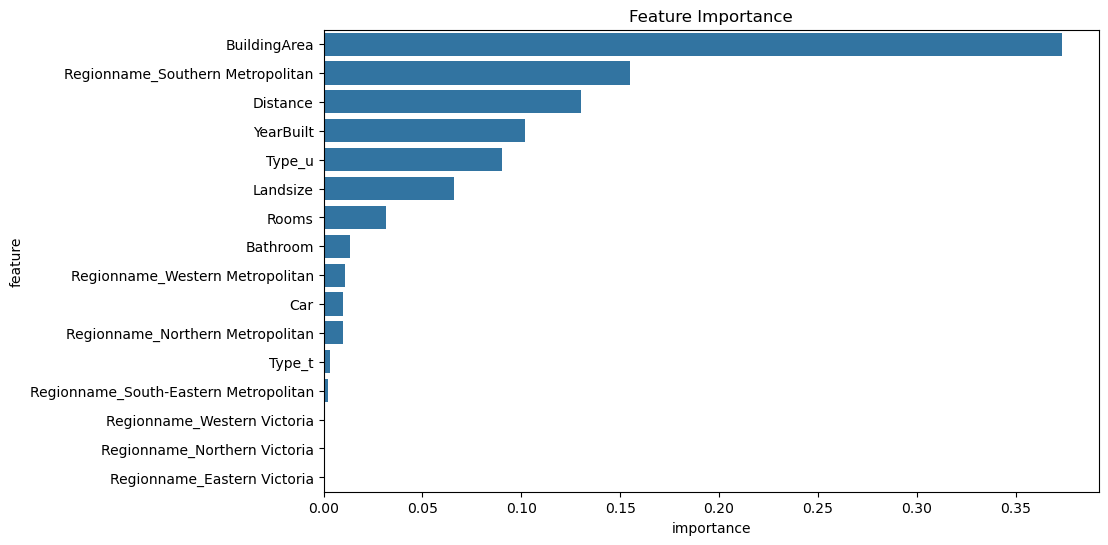

In [22]:
importances = model.feature_importances_
feature_names = X.columns

feature_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_imp_df, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

In [23]:
output = X_test.copy()
output['actual_price'] = y_test_actual
output['predicted_price'] = y_pred_actual
output.to_csv('housing_predictions.csv', index=False)

In [25]:
housing_data['Type']

0       h
1       h
2       h
3       h
4       h
       ..
6825    h
6826    h
6827    h
6828    h
6829    h
Name: Type, Length: 6830, dtype: object

In [27]:
housing_data['Type'].value_counts()

Type
h    4660
u    1528
t     642
Name: count, dtype: int64

In [29]:
output['region_name'] = housing_data['Regionname'].iloc[X_test.index]
output['type'] = housing_data['Type'].iloc[X_test.index]

In [30]:
output.to_csv('housing_predictions2.csv', index=False)